# MAP 435 - TP à trous à rendre pour le dimanche 12 mai 23h59

Le but de cet exercice est de compléter les fonctions manquantes en remplaçant les parties `# YOUR CODE HERE` par votre code.

**Attention** la correction des notebooks se faisant de manière automatique :
- il faut que vous supprimiez la ligne `raise NotImplementedError()` ;
- les seules cellules que vous devez modifier sont celles comportant la mention `# YOUR CODE HERE` ;
- **vous ne devez pas modifier le nom du fichier faute de quoi votre devoir ne sera pas corrigé**.

Merci d'inscrire votre nom dans la cellule ci-dessous.

# Algorithmes de gradient VS algorithme multi-pas

Le but de cet exercice est de comparer les algorithmes du gradient à pas fixe et du gradient conjugué avec un algorithme multi-pas.

Une fois les différents algorithmes et les différentes variables implémentés vous pourrez alors observer la courbe d'erreur pour les algorithmes du gradient à pas fixe, du gradient conjugué et de l'algorithme multi-pas proposé dans ce TP en fonction du nombre d'itérations et ainsi observer si le comportement des ces algorithmes est en accord avec ce qui est annoncé dans votre polycopié.


## Chargement des librairies utilisées

In [1]:
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import sparse
from scipy.sparse import linalg

## Présentation des différents algorithmes
On se propose ici de comparer l'algorithme du gradient à pas fixe et celui du gradient conjugué avec l'algorithme de la boule pesante.

### Algorithmes déjà implémentés

Vous trouverez ci-dessous les algorithmes du gradient à pas fixe et du gradient conjugué. Ces algorithmes sont complets et **vous n'avez pas à les modifier**. Ils sont simplement présents afin de comparer et valider le résultat que vous obtiendrez avec l'algorithme présenté dans ce TP.


#### Algorithme de gradient à pas fixe

On implémente d'abord la méthode du gradient à pas fixe. 
Les arguments sont : la fonctionnelle à minimiser `f`, son gradient `df` et un point initial `x_init`. On y ajoute les arguments optionnels suivants : le pas du gradient `pas`, la tolérance demandée `tol` et le nombre maximal d'itérations `maxiter`.

Soit $x_0 \in \mathbb R^N$ donné. On définit la suite $(x_k)_{k\ge 0}$ par :

\begin{equation}
x_{k+1} = x_k - \rho \nabla J(x_k),
\end{equation}

où $\rho >0$ est le pas de l'algorithme.


In [2]:
def gradientPasFixe(f,df,x_init,pas=1e-01,tol=1e-06,maxiter=200):
    
    # initialisation
    x=x_init.copy()
    xtab=[]
    ftab=[]
    
    xtab.append(x) # on ajoute x à la liste xtab
    ftab.append(f(x))
    
    it=0 # compteur d'itération
    
    while((it==0) or (it<maxiter and np.linalg.norm(df(xtab[-1]))>tol)):
    
        x=x-pas*df(x)
        
        xtab.append(x)
        ftab.append(f(x))
        
        it=it+1
    
    # booléen pour indiquer la convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    
    return xtab, ftab, conv
    

#### Algorithme du gradient conjugué

On implémente maintenant l'algorithme du gradient conjugué appliqué à la fonctionnelle quadratique $J: \mathbb R^2 \rightarrow \mathbb R$ telle que  
$$ J(x) = \frac12 \langle Ax,x\rangle - \langle b,x\rangle,$$
où $A\in\mathcal M_n(\mathbb R)$ est une matrice symétrique définie positive.

Dans ce cas l'algorithme s'écrit de la manière suivante :

\begin{equation}
\left\{
\begin{aligned}
 & x_0\text{ étant donné, on calcule } r_0=Ax_0-b \text{ et }p_0=r_0.\\
  &\text{Pour }k=1,2,\ldots\text{, on calcule :}\\
  &\left\{
  \begin{aligned}
  \mu_k&=\frac{\|r_k\|^2}{\langle A p_k, p_k \rangle},\\
  x_{k+1}&=x_k - \mu_k p_k,\\
  r_{k+1} &= r_k - \mu_k A p_k.
 \end{aligned}
 \right.\\
 &\text{Si }\|r_k\|< \varepsilon ||b||\text{ alors on s'arrête.}\\
 &\text{Sinon }
 \left\{
\begin{aligned}
\beta_k &= \frac{\|r_{k+1}\|^2}{\|r_k\|^2},\\
 p_{k+1}&=r_{k+1} + \beta_k p_k.
\end{aligned}
\right.
 \end{aligned}
 \right.
\end{equation}


In [3]:
def gradientConjugue(A,b,f,x_init,tol=1e-06,maxiter=200):
    
    # initialisation
    x=x_init.copy()
    r=A@x-b
    p=r.copy()
    
    ps_r=np.dot(r,r)
    
    xtab=[]
    ftab=[]
    xtab.append(x) # on ajoute x à la liste xtab
    ftab.append(f(x))
    
    it=0 # compteur d'itération

    while((it==0) or (it<maxiter and np.linalg.norm(A@(xtab[-1])-b)>tol)):
        
        # Calcul du produit matriciel A p_k
        Ap=A@p

        # Calcul de mu_k
        mu=ps_r/np.dot(Ap,p)

        # Calcul de x_{k+1}
        x=x-mu*p

        # Calcul de r_{k+1}
        r=r-mu*Ap

        # Calcul du produit scalaire <r_{k+1},r_{k+1}> 
        ps_rnew=np.dot(r,r)

        # Calcul de beta_{k+1}
        beta=ps_rnew/ps_r

        # Calcul de p_{k+1}
        p=r+beta*p

        # On met à jour la valeur du produit scalaire <r_k,z_k>
        ps_r=ps_rnew
        
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
        
    # booléen pour indiquer la convergence
    # np.isnan renvoie "False" si la quantité est bien un nombre et "True" sinon 
    if(it==maxiter) or (np.isnan(np.linalg.norm(x))==True):
        conv = False
    else:
        conv = True
    
    return xtab, ftab, conv
    

### Algorithme de la boule pesante 

On s'intéresse dans ce TP à l'algorithme de la boule pesante présenté dans votre polycopié et rappelé ci-dessous. 

On construit la suite $(x_k)_k$ définie par :

\begin{equation}
\left\{
\begin{aligned}
&x_0,x_{-1} \in \mathbb R^N \text{ quelconque}, \\
&x_{k+1} = x_k - \mu \nabla J(x_k)+\nu(x_k-x_{k-1}),
\end{aligned}
\right.
\end{equation}

où $\mu >0$ et $\nu>0$ sont les pas de l'algorithme. 

Le but est alors de mettre en place cet algorithme et de le comparer avec les algorithmes du gradient à pas fixe et de gradient conjugué. 

**Q1)** Complétez le code ci-dessous qui, connaisant les pas $\mu$ et $\nu$, permet de calculer l'itérée $x_{k+1}$ en fonction des itérées $x_k$ et $x_{k-1}$ pour l'algorithme de la boule pesante.

Les arguments de cette fonction sont : la valeur de l'itérée $x_k$ notée `x`, la valeur de l'itérée $x_{k-1}$ notée `x_moins`, le gradient de la fonctionnelle à minimiser `df` ainsi que les pas $\mu$ et $\nu$ notés respectivement `pas_mu` et `pas_nu`.


In [4]:
def fct_calcul_iteree(x, x_moins, df, pas_mu, pas_nu):
    # YOUR CODE HERE
    x_plus = x - pas_mu*df(x) + pas_nu*(x - x_moins)
    #raise NotImplementedError()
    return x_plus
    

On donne maintenant l'algorithme de la boule pesante dans lequel l'itérée $x_{k+1}$ est obtenue en utilisant la fonction `fct_calcul_iteree` que vous venez de construire.

Les arguments de cette fonction sont : la fonctionnelle à minimiser `f`, son gradient `df` et un point initial `x_init`. On y ajoute les arguments optionnels suivants : les pas $\mu$ et $\nu$ notés respectivement `pas_mu` et `pas_nu`, la tolérance demandée `tol` et le nombre maximal d'itérations `maxiter`.

In [5]:
def boule_pesante(f,df,x_init,pas_mu=1e-01,pas_nu=1e-01,tol=1e-06,maxiter=200):
    
    # initialisation
    x=x_init.copy()
    x_moins=x_init.copy()
    xtab=[]
    ftab=[]
    
    xtab.append(x) # on ajoute x à la liste xtab
    ftab.append(f(x))
    
    it=0 # compteur d'itération
    
    while((it==0) or (it<maxiter and np.linalg.norm(df(xtab[-1]))>tol)):
        
        x_plus = fct_calcul_iteree(x, x_moins, df, pas_mu, pas_nu)
        
        x_moins=x
        x=x_plus
        
        xtab.append(x)
        ftab.append(f(x))
        
        it=it+1
    
    # booléen pour indiquer la convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    
    return xtab, ftab, conv
    

## Définition du problème

On va chercher à minimiser la fonctionnelle suivante $J: \mathbb R^n \rightarrow \mathbb R$ telle que  
$$ J(x) = \frac\lambda2 \|x-v\|^2_2 + \frac12 \|Dx\|^2_2,$$
avec $v\in\mathbb R^n$ quelconque et $D$ la matrice carrée de taille $n$ telle que 
\begin{equation}
Dx = 
\left\{
\begin{alignedat}{2}
x_{i+1}&-x_i \quad &&\text{ si } \, i\ne n, \\
&0 \quad &&\text{ sinon,}
 \end{alignedat}
\right. \quad \text{ pour } x=(x_i)_{1\le i \le n}.
\end{equation}


**Q2)** Compléter la fonction `const_D(n)` qui permet de construire la matrice  **creuse** carrée $D$ de taille $n$. **Attention à bien construire une matrice creuse !**

In [6]:
def const_D(n):
    # YOUR CODE HERE
    #raise NotImplementedError()
    t = np.zeros((n,n))
    for i in range(n-1):
       t[i][i] = -1
       t[i][i+1] = 1
    D = sparse.csr_matrix(t)
    return D
   


In [7]:
## On affiche votre matrice D

## Calcul de la matrice que vous avez construite
mat_D_test=const_D(10)

## On affiche la matrice pour une petite valeur de n
print(mat_D_test.todense())


[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [8]:
# taille de la matrice
n = 5000

# construction de la matrice D
mat_D = const_D(n)

# définition du vecteur v
vec_v = np.random.rand(n)

# définition du paramètre lambda
l=0.8

**Q3)** Construire la fonctionnelle $J$.

In [9]:
## Définition de la fonctionnelle
def fct_J(x):
    # YOUR CODE HERE
    #raise NotImplementedError()
    v = x - vec_v
    w = mat_D@x
    J = 0.5*l*np.dot(v,v) + 0.5*np.dot(w,w)
    return J

In [10]:
x_test = np.ones(n)

## Valeur de la fonctionnelle pour un vecteur x aléatoire
print(fct_J(x_test))


657.5784041284627


**Q4)** Construire le gradient de la fonctionnelle $J$.

In [11]:
def fct_gradJ(x):
    # YOUR CODE HERE
    #raise NotImplementedError()
    B = np.transpose(mat_D)
    v = x - vec_v
    w = mat_D@x
    w = B@w
    dJ = l*v + w
    return dJ

In [12]:
x_test=np.ones(n)

## Valeur du gradient de la fonctionnelle pour un vecteur x aléatoire
print(fct_gradJ(x_test))


[0.7441567  0.78131201 0.51214618 ... 0.72264833 0.79155305 0.78113796]


## Observation des résultats

On peut remarquer que l'étude de ce problème est équivalent à la minimisation d'une fonctionnelle quadratique $ J(x) = \frac12 \langle Ax,x\rangle - \langle b,x\rangle$ avec :
$$ A = \lambda I_n + D^TD \quad \text{ et } \quad b=\lambda v.$$


**Q5)** Compléter la fonction `const_A(n,D,par_l)` (où `par_l`$=\lambda$) qui permet de construire la matrice  **creuse** carrée $A$ de taille $n$. **Attention à bien construire une matrice creuse !**


In [13]:
def const_A(n,D,par_l):
    # YOUR CODE HERE
    #raise NotImplementedError()
    B = np.transpose(D)
    I = np.eye(n)
    A = par_l*I + B@D 
    A = sparse.csr_matrix(A)
    return A


In [14]:
## On affiche votre matrice A

## Calcul de la matrice que vous avez construite
mat_D_test = const_D(10)
mat_A_test = const_A(10,mat_D_test,l)

## On affiche la matrice pour une petite valeur de n
print(mat_A_test.todense())


[[ 1.8 -1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   2.8 -1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   2.8 -1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   2.8 -1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   2.8 -1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   2.8 -1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   2.8 -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   2.8 -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   2.8 -1. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   1.8]]


Afin de pouvoir appliquer l'algorithme du gradient à pas fixe avec le pas donnant le meilleur taux de convergence possible on a besoin de connaître la plus grande et la plus petite valeur propre de la matrice $A$ notées `vp_max` et `vp_min`.

In [15]:
mat_A = const_A(n,mat_D,l)

# Calcul des valeurs propres "vp" de la matrice A 
# pour pouvoir calculer les pas optimaux des différents algorithmes
vp,_=np.linalg.eigh(mat_A.todense())

# Plus grande valeur propre de A
vp_max=np.max(vp)

# Plus petite valeur propre de A
vp_min=np.min(vp)

# Pas optimal pour l'algorithme du gradient à pas fixe
pas_fixe = 2/(vp_min+vp_max)


On calcule maintenant le minimum de la fonctionnelle $J$
pour pouvoir comparer la solution exacte et la solution approchée.

In [16]:
sol=linalg.spsolve(mat_A.tocsc(), l*vec_v, use_umfpack=True)

**Q6)** En utilisant les informations données dans le polycopié et en gardant les mêmes notations complétez la fonction `pas_nu` ci-dessous qui permet de calculer le pas $\nu$ donnant la meilleure vitesse de convergence pour l'algorithme de la boule pesante.


In [17]:
def pas_nu():
     
    # YOUR CODE HERE
    #raise NotImplementedError()
    L = np.sqrt(vp_max)
    a = np.sqrt(vp_min)
    r = (L-a)/(L+a)
    return r**2

In [18]:
# On affiche le pas nu que vous venez de calculer
print(pas_nu())


0.17657147385383043


**Q7)** En utilisant les informations données dans le polycopié et en gardant les mêmes notations complétez la fonction `pas_mu` ci-dessous qui permet de calculer le pas $\mu$ donnant la meilleure vitesse de convergence pour l'algorithme de la boule pesante.



In [19]:
def pas_mu():
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    L = np.sqrt(vp_max)
    a = np.sqrt(vp_min)
    r = (L+a)**2
    return 4.0/r
    

In [20]:
# On affiche le pas mu que vous venez de calculer
print(pas_mu())



0.4202041274281422


On va maintenant calculer la solution obtenue avec les 3 algorithmes. On trace ensuite pour chacun d'eux l'erreur en fonction du nombre d'itérations. 

Les résultats obtenus et les informations données dans le polycopié doivent vous permettre de valider ou d'invalider votre code.

In [21]:
x_init=np.ones(n)


print('=================================')
print('Algorithme du gradient à pas fixe')
x_PasFixe, f_PasFixe, conv_PasFixe = gradientPasFixe(fct_J,fct_gradJ,x_init,pas_fixe,1e-6,5000)
print('Erreur = ',np.linalg.norm(sol-x_PasFixe[-1]))
print('Convergence =',conv_PasFixe)
print('Nombre d itérations = ',np.shape(x_PasFixe)[0]-1)

print('=================================')
print('Algorithme du gradient conjugué')
x_Conj, f_Conj, conv_Conj = gradientConjugue(mat_A,l*vec_v,fct_J,x_init,tol=1e-06,maxiter=200)
print('Erreur = ',np.linalg.norm(sol-x_Conj[-1]))
print('Convergence =', conv_Conj)
print('Nombre d itérations = ',np.shape(x_Conj)[0]-1)

print('=================================')
print('Algorithme de la boule pesante')
x_BP, f_BP, conv_BP = boule_pesante(fct_J, fct_gradJ, x_init, pas_mu(), pas_nu(), 1e-6, 5000)
print('Erreur = ',np.linalg.norm(sol-x_BP[-1]))
print('Convergence =',conv_BP)
print('Nombre d itérations = ',np.shape(x_BP)[0]-1)


Algorithme du gradient à pas fixe
Erreur =  8.871179590278899e-07
Convergence = True
Nombre d itérations =  52
Algorithme du gradient conjugué
Erreur =  4.4482258468766665e-07
Convergence = True
Nombre d itérations =  20
Algorithme de la boule pesante
Erreur =  1.1001516120718372e-06
Convergence = True
Nombre d itérations =  23


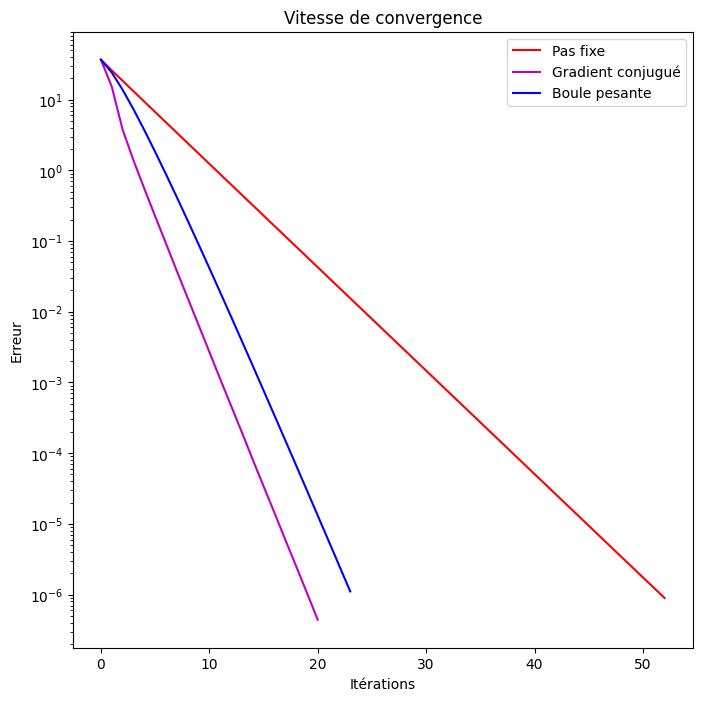

In [79]:
plt.figure(figsize=(8,8))
plt.semilogy(np.linalg.norm(x_PasFixe-sol,axis=1),'-r')
plt.semilogy(np.linalg.norm(x_Conj-sol,axis=1),'-m')
plt.semilogy(np.linalg.norm(x_BP-sol,axis=1),'-b')
plt.legend(['Pas fixe','Gradient conjugué','Boule pesante'])
plt.title('Vitesse de convergence')
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()